---
2023 ENPH 257 Thermodynamic Project  
Copyright (c) 2023 Yun Xing.  
Creative Common, Attribution, Non-commercial, Share-Alike.  


In [1]:
import scipy
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import seaborn as sns
import cftime
import math
from itertools import product
np.random.seed(257)
sns.set_theme(style="whitegrid")
plt.rcParams.update({"axes.grid": True, "grid.alpha": 0.2})
colors = sns.color_palette("pastel", 4)

In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 11
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

# Surface Temperature approximation using CMIP6 simulations

---

## Background

The planetary radiation equilibrium must be achieved for the Earth's temperature to remian constant. This means on the top of atmosphere (TOA) the total incident radiation must equals the amount of emitted radiation. 
  
$$Q_{in}=Q_{out} \tag{1}$$
  
The incident shortwave radiation is proporational to the solar constant: 
  
$$Q_{in} = \frac{Q_0}{4}$$ 

The emitted shortwave radiation is proporational to the incident shortwave: 
  
$$Q_{out-SW} = \alpha \cdot \frac{Q_0}{4}$$
  
Where $\alpha$ is the albedo of the earth, the fraction of light reflected.
  
The longwave radiation emitted by the Earth is given by the Stefan-boltzmann law:

$$Q_{out-LW} = \sigma T_{earth}^4 $$ 
  
Thus, the radiation equilibrium eqn (1) becomes:
  
$$\frac{Q_0}{4} = \alpha \cdot \frac{Q_0}{4} + \sigma T_{earth}^4 \;\;\text{or}\;\; (1-\alpha)\frac{Q_0}{4} = \sigma T_{earth}^4 \tag{2}$$ 

The emitted longwave radiation can also be represented using temperature of surface and atmosphere: 
  
At top of the atmosphere(TOA): $$\frac{Q_0}{4} = \alpha \cdot \frac{Q_0}{4} + \epsilon \sigma T_{A}^4 + (1-\epsilon)\sigma T_{S}^4 \tag{3}$$
  
At surface: $$(1-\alpha) \cdot \frac{Q_0}{4} + \epsilon \sigma T_{A}^4 = \sigma T_{S}^4 \tag{4}$$   
Where $\epsilon$ is the emissivity of the atmosphere.
  
We can rearrange equation (3) and (4) to obtain:
  
$$\epsilon\sigma T_{S}^4 =  2\epsilon\sigma T_{A}^4 \tag{5}$$   
  
Eqn (5) suggests that temperature at surface is always higher than the temperature of the atmosphere. 
Substitute eqn (5) into eqn (4), we can obtain:
$$(1-\alpha) \cdot \frac{Q_0}{4} = \sigma T_{S}^4 - \epsilon \sigma T_{A}^4 = \sigma T_{S}^4 - \frac{1}{2}\epsilon \sigma T_{S}^4 = (1-\frac{1}{2}\epsilon) \sigma T_{S}^4 \tag{6}$$      
    
$$T_{S}=\left[\frac{Q_0(1-\alpha)}{4\sigma (1-\frac{1}{2}\epsilon)}\right]^\frac{1}{4} \tag{7}$$
  
**From eqn (7), we can see that if the absorption of the longwave radiation increase, the surface temperature increase. If the reflection of the shortwave radiation increase, the surface temperature drop.**

**Volcanic eruptions eject sulphate and form sulphate aerosol particles in the stratosphere. These particles will change both the absorption of the longwave radiation, and the reflection of the shortwave radiation.** 

### Research question: 
**How does the surface temperature change in the event of a volcanic eruption?**

---

## Methodology

I use a variable $R_L$ to denote the right hand side of eqn (6) - $(1-\frac{1}{2}\epsilon) \sigma T_{S}^4$, the total longwave emission. So $R_L$ depends on both $\epsilon$ and $T_S$.  
The left hand side of eqn (6) - $(1-\alpha) \cdot \frac{Q_0}{4}$, the total shortwave absorption,  depends on $\alpha$ and $T_S$.  
In radiative equilibrium, two are equal. If the composition of the atmosphere changes, there will be a change in the net radiation:
  
$$\Delta Q_{net} = (1-\alpha) \cdot \frac{Q_0}{4} - R_L \tag{8}$$


The new equilibrium response to the net radiation change can be approximated by a Taylor series expansion:
  
$$(1-\alpha_0)\frac{\Delta Q_0}{4} -\frac{Q_0}{4}\left(\frac{\partial \alpha}{\partial \tau}\Delta \tau + \frac{\partial \alpha}{\partial T_S} \Delta T_S \right) - \frac{\partial R_L}{\partial \tau} \Delta \tau - \frac{\partial R_L}{\partial T_S} \Delta T_S \tag{9} = 0$$

- $\tau$ is Aerosol Optical Depth, which indicates the opacity of the atmosphere. I will mainly use the $\tau $ value at the stratosphere. SAOD, is the abbreviation of Stratosphere Aerosol Optical Depth commonly using in atmosphere physics. Having sulphate aerosols in the stratosphere will influence both SW reflection and LW absorption. 
- $(1-\alpha_0)\frac{\Delta Q_0}{4}$ represents the change in the incident shortwave solar radiation. Since the change is small, and can only be observed during the 11 year sunspot cycle. I assume it to be zero in this approximation.   
- $\frac{\partial \alpha}{\partial \tau}\Delta \tau$ represents the change in albedo due to the change of sulphate content in atmosphere.
  
- $\frac{\partial \alpha}{\partial T_S} \Delta T_S$ represents the change in albedo due to the change in surface temperature, normally called climate feedback. 
- $\frac{\partial R_L}{\partial \tau} \Delta \tau$ represents the change in longwave emission due to the change of sulphate content in atmosphere.
- $\frac{\partial R_L}{\partial T_S} \Delta T_S$ represents the change in longwave emission due surface temperature.

Rearranging terms in eqn (9): 

$$-\frac{Q_0}{4}\frac{\partial \alpha}{\partial \tau}\Delta \tau - \frac{\partial R_L}{\partial \tau} \Delta \tau =   \frac{Q_0}{4}\frac{\partial \alpha}{\partial T_S}  \Delta T_S + \frac{\partial R_L}{\partial T_S} \Delta T_S $$

$$-\left(\frac{Q_0}{4}\frac{\partial \alpha}{\partial \tau} + \frac{\partial R_L}{\partial \tau}\right) \Delta \tau =  \left(\frac{Q_0}{4}\frac{\partial \alpha}{\partial T_S} + \frac{\partial R_L}{\partial T_S}\right)\Delta T_S$$

$$\Delta T_S = \frac{-\left(\frac{Q_0}{4}\frac{\partial \alpha}{\partial \tau} + \frac{\partial R_L}{\partial \tau}\right) }{ \left(\frac{Q_0}{4}\frac{\partial \alpha}{\partial T_S} + \frac{\partial R_L}{\partial T_S}\right)}\Delta \tau \tag{10}$$

CIMP6, the coupled model intercomparison project phase 6 by the World Climate research Programme provides the suitable data for this approximation. CMIP6 starts with a central DECK which contains historical simulations to represent the Earth’s natural variability. The central DECK then branches into many directions. I use VolMIP to characterize the volcanic forcing from the characterizing forcing category. 
  
Specifically, I choose piControl, the pre-industrial control experiments from DECK historical simulation, and Volc-Pinatubo-Full from VolMIP. PiControl represent the natural variability of our earth’s climate system. Volc-Pinatubo-Full experiment represents an idealized 1991 Mt Pinatubo-like eruption with full forcing.


Luo (2018) provides the stratospheric aerosol value used in all the volc-pinatubo-full experiments. Around the Pinatubo period (June 1991 to December 1993), data are mostly constructed from satellite observations with minor gaps filled by ground-based lidar measurement.

$$\frac{\partial \alpha}{\partial \tau}, \; \frac{\partial R_L}{\partial \tau}\; \frac{\partial \alpha}{\partial T_S} \; \frac{\partial R_L}{\partial T_S}\; \text{and}\; \Delta \tau$$ 

  
can be obtianed from the above databases, so I can estimate the incremental surface temperature change $\Delta T_S$ and sum the incremental temperature over time to visualize the overall temperature change due to the 1991 Mt Pinatubo eruption.
  
Section 1 reads the $\tau$ value from Luo (2018).  
Section 2 calculates the historcial mean of $\alpha$ and $R_L$ from CIMP6 piControl.  
Section 3 calculates the at eruption value of $\alpha$ and $R_L$ from CIMP6 volc-pinatubo-full, also calculates the anomaly.  
Section 4 approximates the slope by simple linear regression.  
Section 5 calculates the overall temperature change. 

---

**Some common time period to be used throughout the calculation:**

In [3]:
time_cf_noleap = (cftime.DatetimeNoLeap(1991, 8, 1, 0, 0, 0, 0, has_year_zero=True),
                  cftime.DatetimeNoLeap(1993, 12, 31, 0, 0, 0, 0, has_year_zero=True))

time_cf_360 = (cftime.Datetime360Day(1991, 8, 1, 0, 0, 0, 0, has_year_zero=True),
               cftime.Datetime360Day(1993, 12, 30, 0, 0, 0, 0, has_year_zero=True))

time_common_datetime = np.arange("1991-08", "1994-01", dtype='datetime64[M]')

# 1. Bring in `AOD` aerosol optical depth values
### 1.1 Import from local nc file

In [4]:
# import file with variable extinction
file = "data/CMIP_1850_2014_extinction_550nm_strat_only_v3.nc"
aod = xr.open_dataset(file)

# format time form "month since" to datetime64
aod = aod.rename({"month": "time"})

dates_list = np.arange("1850-01", "2015-01", dtype='datetime64[M]')

aod["time"] = xr.DataArray(
    dates_list, 
    coords=[dates_list], 
    dims=["time"], name="time"
)

In [5]:
# calculate AOD as cummulative ext550
aod_array = np.cumsum(aod.ext550, axis=1) * 0.5
aod["aod"] = aod_array

# create weights by the cosine of the latitude
weights = np.cos(np.deg2rad(aod.latitude))

# Area weighted average over latitude 
aod_w = aod.weighted(weights)
aod_wm = aod_w.mean("latitude")

# Select the aod at the highest altitude only
aod = aod_wm["aod"].sel(altitude=39.5).drop_vars("altitude")

# the mean value of the entire aod 
aod_bg = aod.mean().item()
aod_bg

0.01067265123128891

In [6]:
# aod_as_anomaly to be used for models in the aod_anomaly_list
aod_common_anomaly = aod.sel(time=slice(time_common_datetime[0], 
                                        time_common_datetime[-1])) - aod_bg
aod_anomaly = aod_common_anomaly.values

In [7]:
# aod_common_anomaly

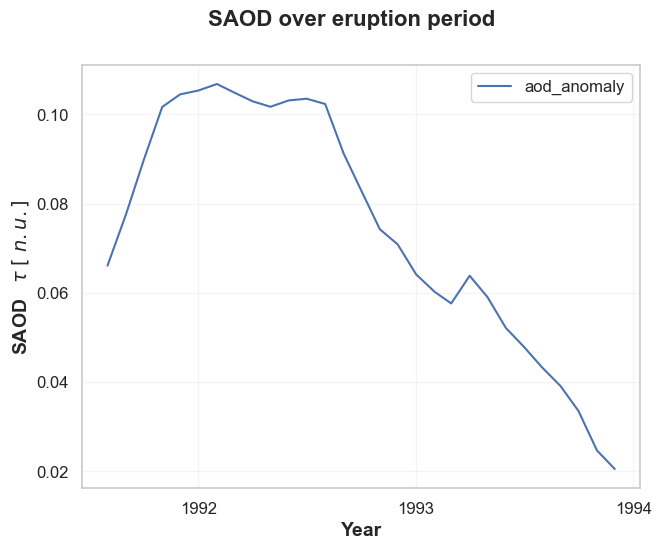

In [8]:
fig, ax = plt.subplots(figsize=(7.2, 5.5))

ax.plot(aod_common_anomaly.time.values, aod_anomaly, label="aod_anomaly")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.legend(frameon=False)
ax.set_xlabel("Year", weight="bold", fontsize=14)
ax.set_ylabel(r"SAOD   $\tau$ $[~n.u.]$", weight="bold", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

title = "SAOD over eruption period"
plt.suptitle(title, fontsize=16, weight="bold")
fig.savefig(f"plot/{title}.png", dpi = 1200)

# 2. PiControl:
### 2.1 Prepare for import piControl experiment from 6 models

In [9]:
# empty xarray Dataset for each pi experiment 
pi_can = xr.Dataset()
pi_ipsl = xr.Dataset()
pi_miroc = xr.Dataset()
pi_giss = xr.Dataset()

In [10]:
# a dictionary for piControl experiment's name, start time, end time, 
# empty xarray.Dataset, and empty dict to hold future statistical results 
pi_list = ["can", "ipsl", "miroc", "giss"]
pi_dict = {
    "can":{
        "name": "CanESM5_r1",
        "start": "5550",
        "end": "6600", 
        "pi_dset": pi_can,
        "stat": {}
    },
    "ipsl":{
        "name": "IPSL-CM6A-LR_r1i1p1f1",
        "start": "3050",
        "end": "3549",
        "pi_dset": pi_ipsl,
        "stat": {}
    },
    "miroc":{
        "name": "MIROC-ES2L_r1",
        "start": "1850",
        "end": "2349", 
        "pi_dset": pi_miroc,
        "stat": {}
    },
    "giss":{
        "name": "GISS-E2.1-G",
        "start": "8000",
        "end": "8399", 
        "pi_dset": pi_giss, 
        "stat": {}
    },
}

### 2.2 Merge all piControl files, drop unnecessary variables, and modify time to cftime 

In [11]:
# loop through each experiment 
for pi in ["can", "ipsl", "miroc", "giss"]:
    name = pi_dict[pi]["name"]
    start = pi_dict[pi]["start"]
    end = pi_dict[pi]["end"]
    
    # loop through four variables:
    for var in ["rlut", "rlutcs", "rsdt", "rsut", "rsutcs", "tas"]:
        file = f"data/piControl/piControl_{name}_{var}_{start}-{end}_GL.nc"
        next_dset = xr.open_dataset(file, decode_times=False)
        pi_dict[pi]["pi_dset"] = pi_dict[pi]["pi_dset"].merge(next_dset)
    
    # specific modification for individual experiment based on their file format 
    if pi == "can":
        pi_dict[pi]["pi_dset"] = pi_dict[pi]["pi_dset"].drop_vars(["time_bnds", "height"])
        
        # note the lat and lon in this datset is [0.0] and [0.0], 
        # the values already represent the global mean.
        # the following line only remove these two dimension. 
        pi_dict[pi]["pi_dset"] = pi_dict[pi]["pi_dset"].mean(["lat", "lon"])
        
        # change the time coordinates from float to cftime 
        pi_dict[pi]["pi_dset"]["time"] = cftime.num2date(pi_dict[pi]["pi_dset"].time, 
                                                         pi_dict[pi]["pi_dset"].time.units, 
                                                         calendar="noleap")

    if pi in ["ipsl", "miroc"]:
        pi_dict[pi]["pi_dset"] = pi_dict[pi]["pi_dset"].drop_vars("time_bnds")
        pi_dict[pi]["pi_dset"]["time"] = cftime.num2date(pi_dict[pi]["pi_dset"].time, 
                                                         pi_dict[pi]["pi_dset"].time.units, 
                                                         calendar="gregorian")
            
    if pi in ["ipsl"]:
        pi_dict[pi]["pi_dset"] = pi_dict[pi]["pi_dset"].mean(["lat", "lon"])
    
    # create new cftime based on the starting and ending years. The date within each month is set to be the 15th
    if pi in ["giss"]:
        dates_list = [
            cftime.DatetimeNoLeap(year, month, 15)
            for year, month in product(range(int(start), int(end)+1), range(1, 13))
        ]
        dates_array = xr.DataArray(dates_list, coords=[dates_list], dims=["time"], name="time")
        pi_dict[pi]["pi_dset"]["time"] = dates_array
        
        
    pi_dict[pi]["pi_dset"]["albedo"] = pi_dict[pi]["pi_dset"]["rsut"] / pi_dict[pi]["pi_dset"]["rsdt"]    

In [12]:
pi_dict["ipsl"]["pi_dset"]

<xarray.Dataset>
Dimensions:  (time: 6000)
Coordinates:
  * time     (time) object 3050-01-16 12:00:00 ... 3549-12-16 12:00:00
Data variables:
    rlut     (time) float32 234.8 235.3 236.3 235.8 ... 239.1 237.3 235.7 234.8
    rlutcs   (time) float32 259.9 260.6 261.9 262.7 ... 265.3 263.3 260.8 259.8
    rsdt     (time) float32 352.8 350.0 345.1 339.3 ... 337.9 343.7 349.2 352.6
    rsut     (time) float32 109.1 105.9 103.2 102.4 ... 100.1 106.1 110.6 111.8
    rsutcs   (time) float32 56.13 53.99 54.12 55.21 ... 50.69 55.09 59.63 59.2
    tas      (time) float32 283.6 284.1 284.9 285.8 ... 286.8 285.7 284.4 283.7
    albedo   (time) float32 0.3091 0.3025 0.2989 0.3018 ... 0.3086 0.3168 0.3172

### 2.3 Calculate the monthly mean of piControl and albedo

In [13]:
for pi in pi_list:
    pi_dict[pi]["monthly_dset"] = pi_dict[pi]["pi_dset"].groupby("time.month").mean("time")

In [14]:
pi_dict["can"]["monthly_dset"]

<xarray.Dataset>
Dimensions:  (month: 12)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    rlut     (month) float32 237.1 237.6 237.9 238.5 ... 242.2 239.5 237.4 236.7
    rlutcs   (month) float32 261.5 261.8 262.7 264.2 ... 267.4 264.9 262.9 261.8
    rsdt     (month) float32 351.4 348.7 343.8 337.9 ... 336.5 342.2 347.6 351.1
    rsut     (month) float32 107.4 102.7 99.35 98.51 ... 95.76 99.91 105.4 108.9
    rsutcs   (month) float32 56.55 54.49 55.04 56.97 ... 49.95 53.9 57.87 58.87
    tas      (month) float32 284.5 284.6 285.3 286.4 ... 287.5 286.5 285.5 284.8
    albedo   (month) float32 0.3057 0.2946 0.289 0.2915 ... 0.2919 0.3033 0.3102

### 1.4 De-seasonalize piControl by subtracting pi-Control monthly mean

In [15]:
for pi in pi_list:

    pi_deseason = pi_dict[pi]["pi_dset"].groupby("time.month") - pi_dict[pi]["monthly_dset"]
    pi_deseason = pi_deseason.drop_vars("month")
    pi_dict[pi]["pi_deseason"] = pi_deseason

In [16]:
pi_dict["can"]["pi_deseason"]

<xarray.Dataset>
Dimensions:  (time: 12612)
Coordinates:
  * time     (time) object 5550-01-16 12:00:00 ... 6600-12-16 12:00:00
Data variables:
    rlut     (time) float32 -0.2937 -0.4717 0.06487 ... 0.6469 0.2856 -0.2287
    rlutcs   (time) float32 0.05615 -0.3408 -0.0683 ... 0.2087 0.05627 -0.1905
    rsdt     (time) float32 -3.052e-05 -3.052e-05 0.0 ... 0.0 -6.104e-05
    rsut     (time) float32 0.05081 -0.6442 -0.07987 ... -0.5114 -0.06194
    rsutcs   (time) float32 0.1452 -0.1341 0.7277 ... -0.1843 -0.4396 -0.3366
    tas      (time) float32 0.03891 -0.05701 0.1188 ... -0.01016 0.05453 -0.1245
    albedo   (time) float32 0.0001446 -0.001847 ... -0.001471 -0.0001764

---

# 3. Volc-pinatubo-full
### 3.1 Import VolMIP UKESM1-0-LL volc-pinatubo-full from local


In [17]:
# empty xarray Dataset for each volcano experiment 
volc_can = xr.Dataset()
volc_ipsl = xr.Dataset()
volc_miroc = xr.Dataset()
volc_giss = xr.Dataset()

In [18]:
# a dictionary for volc-pinatubo-full experiment's name, start time, end time, and xarray.Dataset 
volc_list = ["can", "ipsl", "miroc", "giss"]
volc_dict = {
    
    # volc-pinatubo-full_CanESM5_r1_rlut_1991-1996_GL.nc
    "can":{
        "name": "CanESM5",
        "num_r": 40,
        "start": "1991",
        "end": "1996", 
        "volc_dset": volc_can,
        "stat": {}
    },
    
    
    # volc-pinatubo-full_IPSL-CM6A-LR_r1i1p1f1_rlut_199106-200012_GL.nc
    "ipsl":{
        "name": "IPSL-CM6A-LR",
        "num_r": 25,
        "start": "199106",
        "end": "200012",
        "volc_dset": volc_ipsl,
        "stat": {}
    },
    
    # volc-pinatubo-full_MIROC-ES2L_r1_rlut_199106-199412_GL.nc
    "miroc":{
        "name": "MIROC-ES2L",
        "num_r": 25,
        "start": "199106",
        "end": "199412", 
        "volc_dset": volc_miroc,
        "stat": {}
    },
    
    # volc-pinatubo-full_GISS-E2.1-G_r1_rlut_1991-1994_GL.nc
    "giss":{
        "name": "GISS-E2.1-G",
        "num_r": 25,     # using only 25 members, the rest realization's data value are non-interpretable
        "start": "1991",
        "end": "1994", 
        "volc_dset": volc_giss,    
        "stat": {}
    },
}

### 3.2 Merge all volc files, drop unnecessary variables, and modify time to cftime 

In [19]:
for volc in volc_list:
    
    name = volc_dict[volc]["name"]
    member = volc_dict[volc]["num_r"]
    start = volc_dict[volc]["start"]
    end = volc_dict[volc]["end"]

    for r in range(1, member+1):
        member_dset = xr.Dataset()
        for var in ["rlut", "rlutcs", "rsdt", "rsut", "rsutcs", "tas"]:
            if volc in ["can", "miroc", "giss"]:
                file = f"data/volc-pinatubo-full/volc-pinatubo-full_{name}_r{r}_{var}_{start}-{end}_GL.nc"
            else:
                file = f"data/volc-pinatubo-full/volc-pinatubo-full_{name}_r{r}i1p1f1_{var}_{start}-{end}_GL.nc"
            next_dset = xr.open_dataset(file, decode_times=False)
            member_dset = member_dset.merge(next_dset)
        member_dset_add_coor = member_dset.assign_coords({"member_id": f"r{r}"})
        member_dset_expanded = member_dset_add_coor.expand_dims("member_id")
        volc_dict[volc]["volc_dset"] = volc_dict[volc]["volc_dset"].merge(member_dset_expanded)
    
    volc_dict[volc]["volc_dset"] = volc_dict[volc]["volc_dset"].groupby("time").mean("member_id")
    
    if volc == "can":
        volc_dict[volc]["volc_dset"] = volc_dict[volc]["volc_dset"].drop_vars("height")

    if volc in ["can", "ipsl"]:
        volc_dict[volc]["volc_dset"] = volc_dict[volc]["volc_dset"].drop_vars("time_bnds")
        volc_dict[volc]["volc_dset"] = volc_dict[volc]["volc_dset"].mean(["lat", "lon"])
        volc_dict[volc]["volc_dset"]["time"] = cftime.num2date(volc_dict[volc]["volc_dset"].time, 
                                                               volc_dict[volc]["volc_dset"].time.units, 
                                                               calendar="noleap")
        volc_dict[volc]["volc_dset"] = volc_dict[volc]['volc_dset'].sel(time=slice(time_cf_noleap[0], time_cf_noleap[1]))
        
        
    if volc in ["miroc", "giss"]:
        volc_dict[volc]["volc_dset"]["time"] = cftime.num2date(volc_dict[volc]["volc_dset"].time, 
                                                               volc_dict[volc]["volc_dset"].time.units, 
                                                               calendar="360_day")
        volc_dict[volc]["volc_dset"] = volc_dict[volc]['volc_dset'].sel(time=slice(time_cf_360[0], time_cf_360[1]))
        
    volc_dict[volc]["volc_dset"]["albedo"] = volc_dict[volc]["volc_dset"]["rsut"] / volc_dict[volc]["volc_dset"]["rsdt"]    

In [20]:
volc_dict["giss"]['volc_dset']

<xarray.Dataset>
Dimensions:  (time: 29)
Coordinates:
  * time     (time) object 1991-08-16 12:00:00 ... 1993-12-16 12:00:00
Data variables:
    rlut     (time) float32 241.3 239.4 236.7 235.1 ... 239.5 237.2 235.9 235.6
    rlutcs   (time) float32 261.7 259.9 257.5 255.8 ... 260.2 258.2 257.0 256.5
    rsdt     (time) float32 332.1 336.9 342.8 348.1 ... 336.9 342.8 348.1 351.3
    rsut     (time) float32 99.17 100.3 104.3 109.1 ... 98.48 101.5 106.2 108.2
    rsutcs   (time) float32 53.33 54.62 58.13 62.02 ... 52.28 54.84 58.13 58.51
    tas      (time) float32 288.3 287.5 286.4 285.4 ... 287.3 286.3 285.3 284.8
    albedo   (time) float32 0.2986 0.2977 0.3041 0.3134 ... 0.2962 0.305 0.3079

### 3.3 De-seasonalize volc-pinatubo-full by subtract pi-Control monthly mean

In [21]:
for volc in volc_list:
    volc_deseason = volc_dict[volc]["volc_dset"].groupby("time.month") - pi_dict[volc]["monthly_dset"]
    volc_deseason = volc_deseason.drop_vars("month")
    volc_dict[volc]["volc_deseason"] = volc_deseason

In [22]:
volc_dict["can"]["volc_deseason"]

<xarray.Dataset>
Dimensions:  (time: 29)
Coordinates:
  * time     (time) object 1991-08-16 12:00:00 ... 1993-12-16 12:00:00
Data variables:
    rlut     (time) float32 -0.724 -0.878 -0.8652 ... -0.7208 -0.6545 -0.4664
    rlutcs   (time) float32 -1.028 -1.235 -1.38 ... -0.9336 -0.8096 -0.7627
    rsdt     (time) float32 0.0 -3.052e-05 -3.052e-05 ... 0.0 -9.155e-05
    rsut     (time) float32 1.86 2.4 2.623 2.952 ... 1.162 1.0 0.9023 0.6254
    rsutcs   (time) float32 2.768 3.51 4.01 4.533 ... 1.598 1.334 1.06 0.865
    tas      (time) float32 -0.04953 -0.09082 -0.1188 ... -0.2855 -0.274 -0.2877
    albedo   (time) float32 0.005605 0.007134 0.007663 ... 0.002596 0.001781

### 3.4 Visualize variables from Volc-pinatubo-full in all 6 models 

In [23]:
for volc in volc_list:
    df = volc_dict[volc]["volc_deseason"].to_dataframe().reset_index()
    df["saod"] = aod_anomaly
    df = df.assign(time=[pd.to_datetime(f"{i.year}-{i.month}-{1}") for i in df.time])
    volc_dict[volc]["volc_df"] = df

In [24]:
# volc_dict[volc]["volc_df"] 

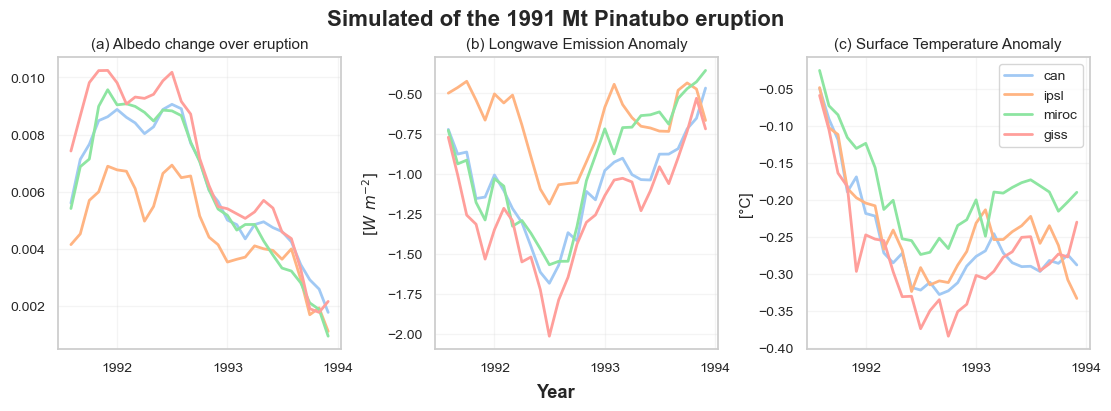

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(11, 4), constrained_layout=True)
c = 0
for volc in volc_list:
    sns.lineplot(ax=axs[0], data=volc_dict[volc]["volc_df"], x="time", y="albedo",
                 color=colors[c], lw=2, label=volc)
    sns.lineplot(ax=axs[1], data=volc_dict[volc]["volc_df"], x="time", y="rlut",
                 color=colors[c], lw=2, label=volc)
    sns.lineplot(ax=axs[2], data=volc_dict[volc]["volc_df"], x="time", y="tas",
                 color=colors[c], lw=2, label=volc)
    c += 1

axs[0].get_legend().remove()
axs[1].get_legend().remove()

axs[0].set_title("(a) Albedo change over eruption")
axs[0].set_xlabel("")
axs[0].set_ylabel("")

axs[1].set_title("(b) Longwave Emission Anomaly")
axs[1].set_xlabel("")
axs[1].set_ylabel("$[W~m^{-2}]$")

axs[2].set_title("(c) Surface Temperature Anomaly")
axs[2].set_xlabel("")
axs[2].set_ylabel("[°C]")

fig.supxlabel("Year", weight="bold")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

title = "Simulated of the 1991 Mt Pinatubo eruption"
plt.suptitle(title, fontsize=16, weight="bold")
fig.savefig(f"plot/{title}.png", dpi = 1200)

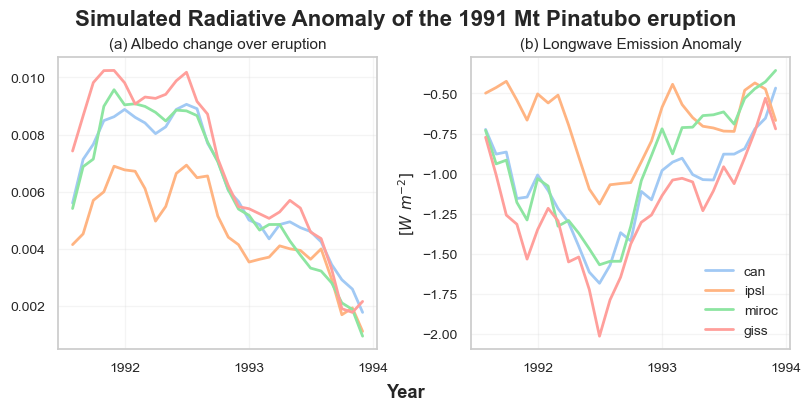

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(8, 4), constrained_layout=True)
c = 0
for volc in volc_list:
    sns.lineplot(ax=axs[0], data=volc_dict[volc]["volc_df"], x="time", y="albedo",
                 color=colors[c], lw=2, label=volc)
    sns.lineplot(ax=axs[1], data=volc_dict[volc]["volc_df"], x="time", y="rlut",
                 color=colors[c], lw=2, label=volc)
    c += 1

axs[0].get_legend().remove()
axs[1].legend(frameon=False, loc="lower right")

axs[0].set_title("(a) Albedo change over eruption")
axs[0].set_xlabel("")
axs[0].set_ylabel("")

axs[1].set_title("(b) Longwave Emission Anomaly")
axs[1].set_xlabel("")
axs[1].set_ylabel("$[W~m^{-2}]$")

fig.supxlabel("Year", weight="bold")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

title = "Simulated Radiative Anomaly of the 1991 Mt Pinatubo eruption"
plt.suptitle(title, fontsize=16, weight="bold")
fig.savefig(f"plot/{title}.png", dpi = 1200)

# 4. Slope Estimation by Linear Regression
### 4.1 calculate slope by devide two datasets

In [36]:
for volc in volc_list:
    
    model_df = volc_dict[volc]["volc_df"]
    s_as, i_as, r, p, sterr = scipy.stats.linregress(x=model_df["saod"], y=model_df["albedo"])
    s_at, i_at, r, p, sterr = scipy.stats.linregress(x=model_df["tas"], y=model_df["albedo"])
    s_rs, i_rs, r, p, sterr = scipy.stats.linregress(x=model_df["saod"], y=model_df["rlut"])
    s_rt, i_rt, r, p, sterr = scipy.stats.linregress(x=model_df["tas"], y=model_df["rlut"])
    volc_dict[volc]["stat"]["s_as"] = s_as
    volc_dict[volc]["stat"]["i_as"] = i_as
    volc_dict[volc]["stat"]["s_at"] = s_at
    volc_dict[volc]["stat"]["i_at"] = i_at
    volc_dict[volc]["stat"]["s_rs"] = s_rs
    volc_dict[volc]["stat"]["i_rs"] = i_rs
    volc_dict[volc]["stat"]["s_rt"] = s_rt
    volc_dict[volc]["stat"]["i_rt"] = i_rt

In [39]:
volc_dict[volc]["stat"]

{'s_as': 0.09717808075174719,
 'i_as': -0.0003174504806626203,
 's_at': 0.0015019021586865538,
 'i_at': 0.0073199929376152216,
 's_rs': -10.46824113818179,
 'i_rs': -0.44541583794270234,
 's_rt': 2.391276500837108,
 'i_rt': -0.5671143674583545}

### 4.2 Plot regression values by model

In [67]:
def plot_all_linear_regression_one_model(volc_dict, volc):

    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 7), constrained_layout=True)
    
    albedo_saod = sns.regplot(ax=axs[0, 0], data=volc_dict[volc]["volc_df"], y="albedo", x="saod", scatter_kws={'s':15})
    raw_slope = round(volc_dict[volc]["stat"]["s_as"], 3)
    slope_str = f"– {abs(raw_slope)}" if raw_slope < 0.00 else f" {raw_slope}"
    raw_inter = round(volc_dict[volc]["stat"]["i_as"], 3)
    inter_str = f"– {abs(raw_inter)}" if raw_inter < 0.00 else f" + {raw_inter}"
    albedo_saod.annotate(r"$\alpha$ = " + slope_str + r" $\tau$" + inter_str, xy=(0.5, 0.2), xycoords="axes fraction")
    axs[0, 0].set_title(r"(a) Albedo vs SAOD", weight="bold")
    axs[0, 0].set_xlabel("")
    axs[0, 0].set_ylabel(r"$\alpha$, Albedo")

    
    
    albedo_tas = sns.regplot(ax=axs[0, 1], data=volc_dict[volc]["volc_df"], y="albedo", x="tas", scatter_kws={'s':15})
    raw_slope = round(volc_dict[volc]["stat"]["s_at"], 3)
    slope_str = f"– {abs(raw_slope)}" if raw_slope < 0.00 else f" {raw_slope}"
    raw_inter = round(volc_dict[volc]["stat"]["i_at"], 3)
    inter_str = f"– {abs(raw_inter)}" if raw_inter < 0.00 else f" + {raw_inter}"
    albedo_tas.annotate(r"$\alpha$ = " + slope_str + r" $T$" + inter_str, xy=(0.5, 0.2), xycoords="axes fraction")
    axs[0, 1].set_title(r"(b) Albedo vs $T_S$", weight="bold")
    axs[0, 1].set_xlabel("")
    axs[0, 1].set_ylabel("")
    
    
    rlut_saod = sns.regplot(ax=axs[1, 0], data=volc_dict[volc]["volc_df"], y="rlut", x="saod", scatter_kws={'s':15})
    raw_slope = round(volc_dict[volc]["stat"]["s_rs"], 3)
    slope_str = f"– {abs(raw_slope)}" if raw_slope < 0.00 else f" {raw_slope}"
    raw_inter = round(volc_dict[volc]["stat"]["i_rs"], 3)
    inter_str = f"– {abs(raw_inter)}" if raw_inter < 0.00 else f" + {raw_inter}"
    rlut_saod.annotate(r"$F$ = " + slope_str + r" $\tau$" + inter_str, xy=(0.1, 0.2), xycoords="axes fraction") 
    axs[1, 0].set_title(r"(c) $R_L$ vs SAOD", weight="bold")
    axs[1, 0].set_xlabel(r"SAOD")
    axs[1, 0].set_ylabel(r"$R_L$, Longwave radiation")
    
    
    rlut_tas = sns.regplot(ax=axs[1, 1], data=volc_dict[volc]["volc_df"], y="rlut", x="tas", scatter_kws={'s':15})
    raw_slope = round(volc_dict[volc]["stat"]["s_rt"], 3)
    slope_str = f"– {abs(raw_slope)}" if raw_slope < 0.00 else f" {raw_slope}"
    raw_inter = round(volc_dict[volc]["stat"]["i_rt"], 3)
    inter_str = f"– {abs(raw_inter)}" if raw_inter < 0.00 else f" + {raw_inter}"
    rlut_tas.annotate(r"$F$ = " + slope_str + r" $T$" + inter_str, xy=(0.5, 0.2), xycoords="axes fraction")
    axs[1, 1].set_title(r"(d) $R_L$ vs $T_S$", weight="bold")
    axs[1, 1].set_xlabel(r"$T_S$, surface temperature")
    axs[1, 1].set_ylabel("")
    
    name = volc_dict[volc]["name"]
    title = f"Linera fit of Albedo and LW Radiation Anomaly of {name}"
    fig.suptitle(title, fontsize=14, weight="bold")
    fig.savefig(f"plot/{title}.png", dpi=1200)
    
    return None 

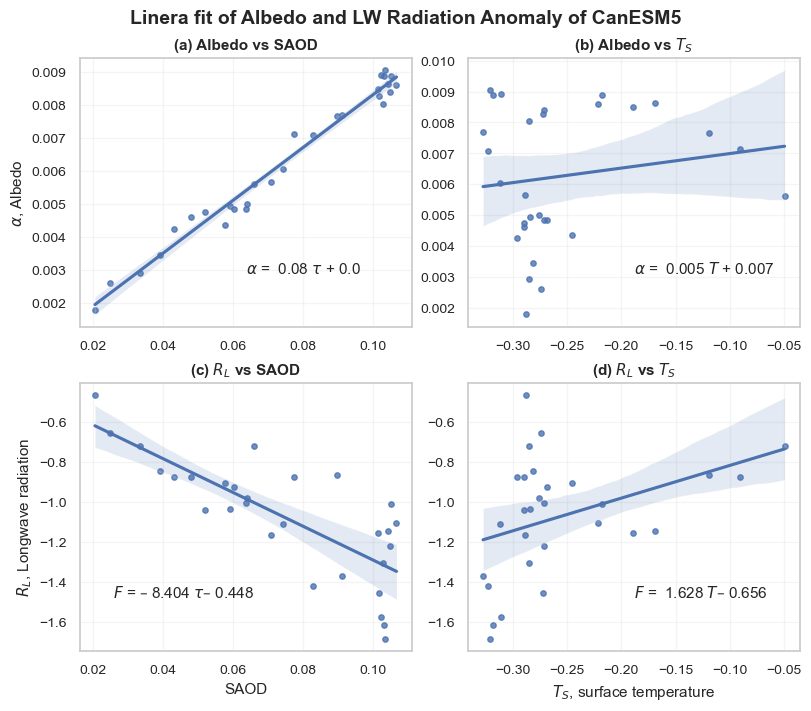

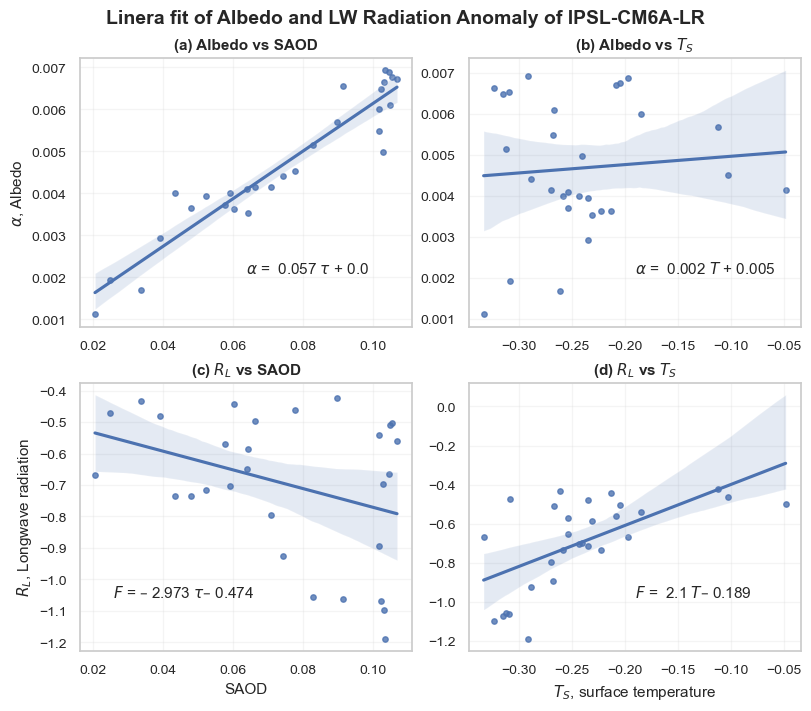

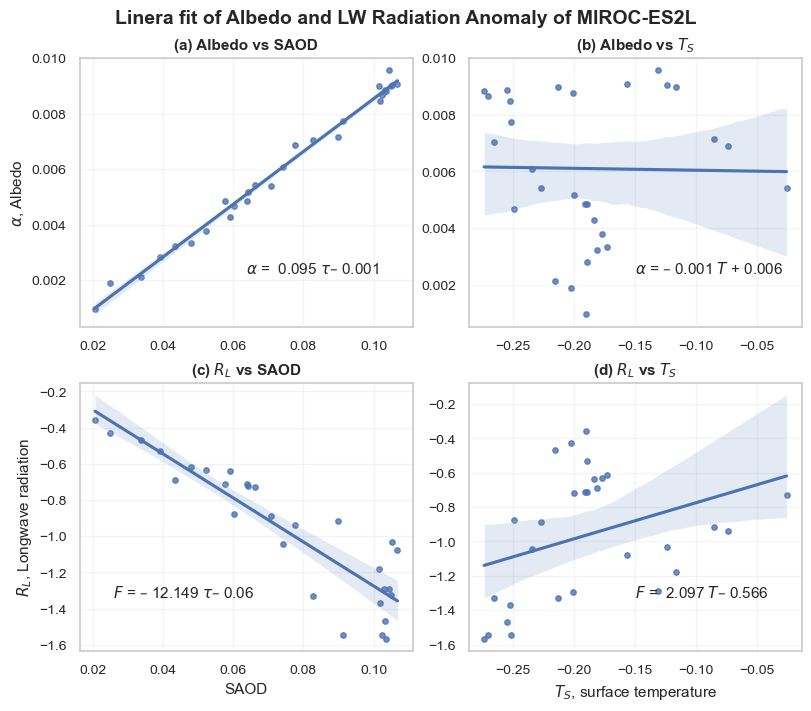

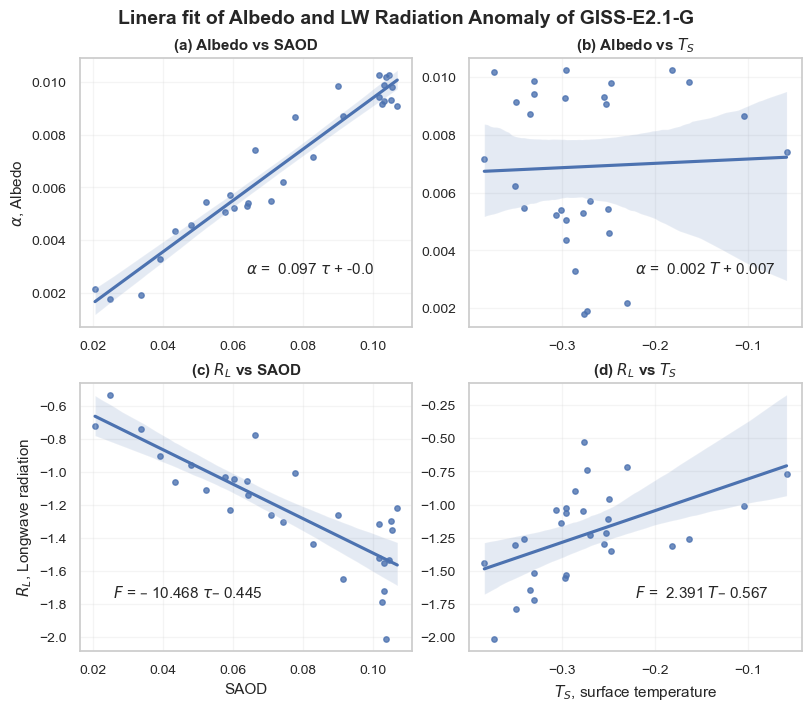

In [68]:
# plot_all_linear_regression_one_model(volc_dict, "can")
# plot_all_linear_regression_one_model(volc_dict, "ipsl")
# plot_all_linear_regression_one_model(volc_dict, "miroc")
# plot_all_linear_regression_one_model(volc_dict, "giss")

### 4.3 Plot regression values by variable

In [70]:
def update_row_col(nrows, ncols, row_int, col_int):
    """
    A function to help plotting, update row_int and col_int at each function call
    """
    if col_int < ncols - 1:
        col_int += 1
    else:
        col_int = 0
        row_int += 1
    return row_int, col_int

In [80]:
def plot_linear_regression_all_model_by_variable(volc_dict, var):
    """
    param: var to be choose from "as", "at", "rs", "rt"
    """

    if var == "as":
        y_data = "albedo"
        x_data = "saod"
        y_label = "Albedo"
        x_label = "SAOD"
        slope = "s_as"
        intercept = "i_as"
    elif var == "at":
        y_data = "albedo"
        x_data = "tas"
        y_label = "Albedo"
        x_label = "Surface temperature"
        slope = "s_at"
        intercept = "i_at"    
    elif var == "rs":
        y_data = "rlut"
        x_data = "saod"
        y_label = "Longwave radiation"
        x_label = "SAOD"
        slope = "s_rs"
        intercept = "i_rs"   
    else:
        y_data = "rlut"
        x_data = "tas"
        y_label = "Longwave radiation"
        x_label = "Surface temperature"
        slope = "s_rt"
        intercept = "i_rt" 
        
    fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8, 7), constrained_layout=True)
    row = 0
    col = 0
    
    for volc in volc_list:
        sns.regplot(ax=axs[row, col], data=volc_dict[volc]["volc_df"], y=y_data, x=x_data, scatter_kws={'s':15})
        raw_slope = round(volc_dict[volc]["stat"][slope], 3)
        slope_str = f"– {abs(raw_slope)}" if raw_slope < 0.00 else f" {raw_slope}"
        raw_inter = round(volc_dict[volc]["stat"]["i_as"], 3)
        inter_str = f"– {abs(raw_inter)}" if raw_inter < 0.00 else f" + {raw_inter}"
        if var == "as":
            annotate_str = r"$\alpha$ = " + slope_str + r" $\tau$" + inter_str
        elif var == "at":
            annotate_str = r"$\alpha$ = " + slope_str + r" $T$" + inter_str
        elif var == "rs":
            annotate_str = r"$F$ = " + slope_str + r" $\tau$" + inter_str
        else:
            annotate_str = r"$F$ = " + slope_str + r" $T$" + inter_str
        axs[row, col].annotate(annotate_str, xy=(0.5, 0.2), xycoords="axes fraction")
        axs[row, col].set_title(volc_dict[volc]["name"], weight="bold")
        axs[row, col].set_xlabel("")
        axs[row, col].set_ylabel("")
        row, col = update_row_col(2, 2, row, col)

        
    title = f"Linera fit of {y_label} vs {x_label} among models"
    fig.supxlabel(x_label, weight="bold")
    fig.supylabel(y_label, weight="bold")
    fig.suptitle(title, fontsize=14, weight="bold")
    fig.savefig(f"plot/{title}.png", dpi=1200)
    
    return None 

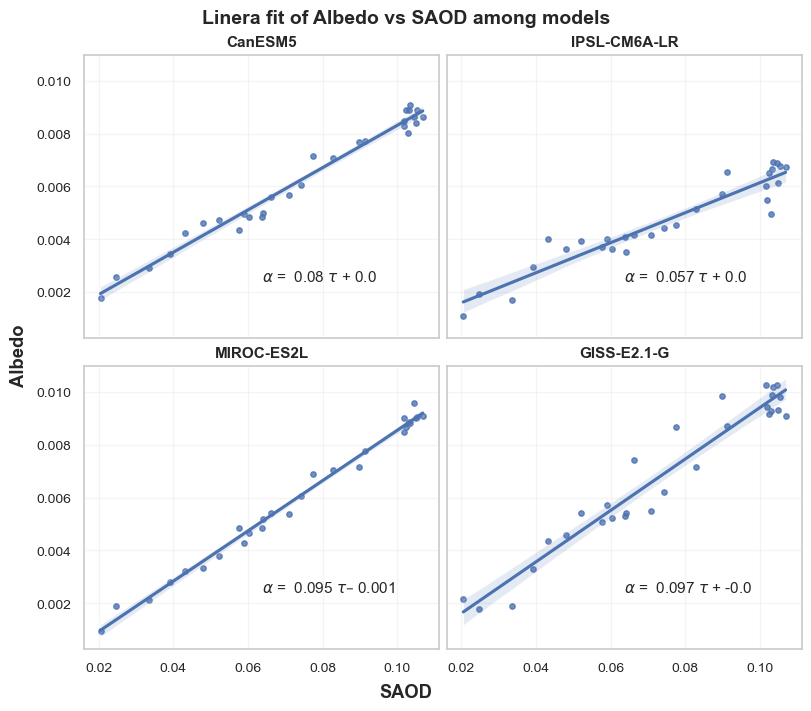

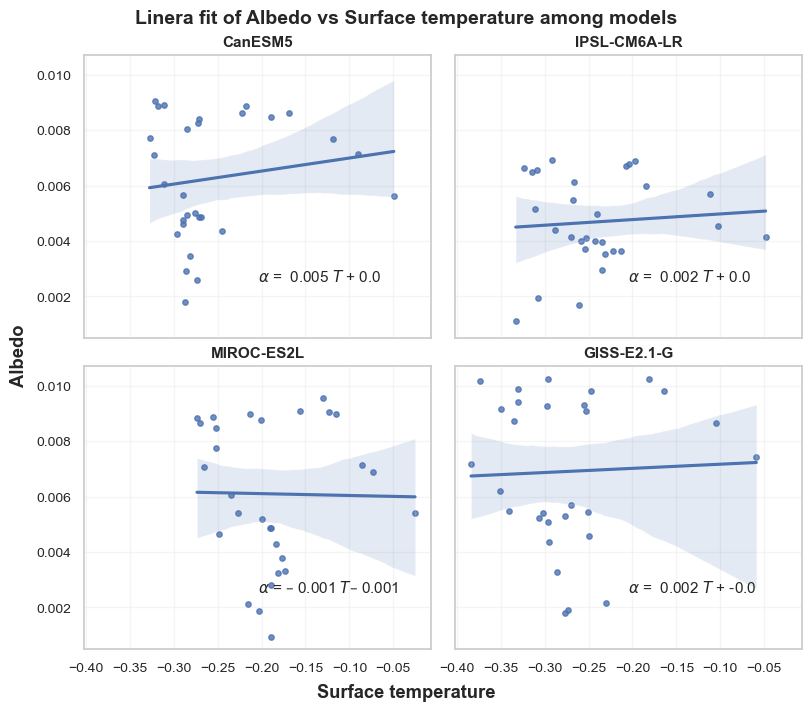

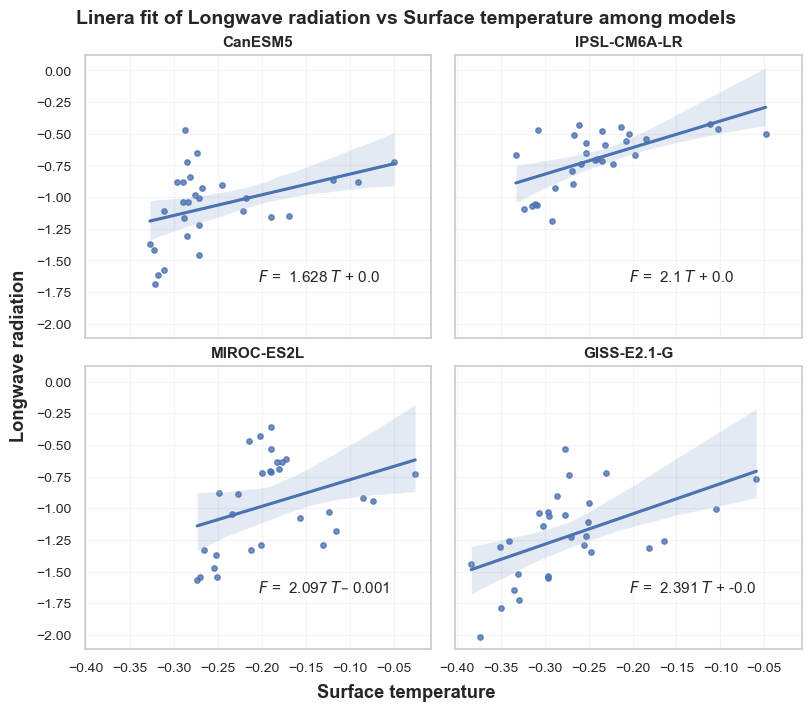

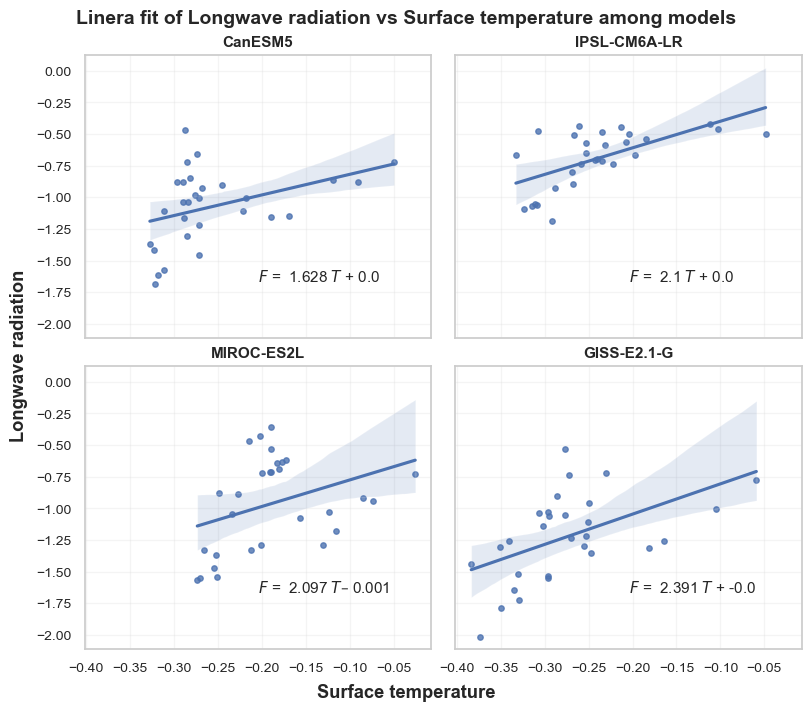

In [82]:
# plot_linear_regression_all_model_by_variable(volc_dict, "as")
# plot_linear_regression_all_model_by_variable(volc_dict, "at")
# plot_linear_regression_all_model_by_variable(volc_dict, "ls")
# plot_linear_regression_all_model_by_variable(volc_dict, "lt")

In [29]:
Q = 1360
denominator = Q/4 * s_at + s_rt

delta_saod = list(0 for i in range(22))
numerators = list(0 for i in range(22))
delta_tas = list(0 for i in range(23))
for i in range(22):
    delta_saod[i] = can_volc_df["saod"][i+1] - can_volc_df["saod"][i]
    numerators[i] = (- Q/4* s_as - s_rs)*delta_saod[i]
#     numerators[i] = (- Q/4* s_as)*delta_saod[i]
    delta_tas[i+1] = numerators[i]/denominator

delta_tas

[0,
 -0.06660076755937777,
 -0.0711802170827838,
 -0.06904226818909362,
 -0.016382173690369935,
 -0.005112019235862247,
 -0.008455811692491315,
 0.011115020233954942,
 0.011431962046559071,
 0.00710259062002731,
 -0.008259770571323544,
 -0.0021999592483301082,
 0.006859792564787914,
 0.0643834315450025,
 0.04894592992392023,
 0.04997752915701483,
 0.01974932294724423,
 0.039113063689326925,
 0.02261969602970047,
 0.015244363849852215,
 -0.03611316653278349,
 0.027845335915364196,
 0.04031509389712375]

In [30]:
delta_tas_cumsum = np.cumsum(delta_tas)
delta_tas_cumsum

array([ 0.        , -0.06660077, -0.13778098, -0.20682325, -0.22320543,
       -0.22831745, -0.23677326, -0.22565824, -0.21422628, -0.20712368,
       -0.21538346, -0.21758341, -0.21072362, -0.14634019, -0.09739426,
       -0.04741673, -0.02766741,  0.01144566,  0.03406535,  0.04930972,
        0.01319655,  0.04104188,  0.08135698])

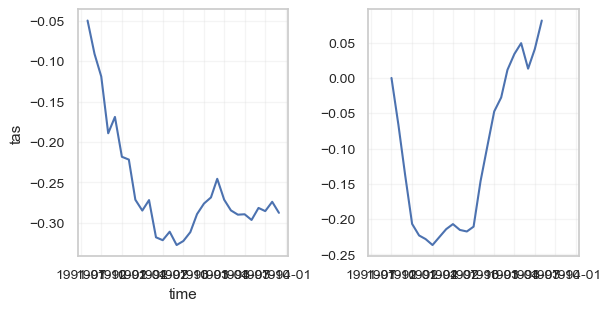

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(6, 3), constrained_layout=True)
sns.lineplot(ax=axs[0], data=can_volc_df, x="time", y="tas")
axs[1].plot(volc_dict["can"]["volc_df"]["time"].unique()[2:25], delta_tas_cumsum, label="aod_anomaly")

# sns.lineplot(data=can_volc_df, x="time", y="albedo")

In [ ]:
sns.regplot(data=can_volc_df, x="tas", y="rlut")

In [ ]:
sns.regplot(data=can_volc_df, x="albedo", y="rlut")

---

In [ ]:
# calculate AOD as cummulative ext
aod_array = np.cumsum(aod.ext550, axis=1) * 0.5
aod["aod"] = aod_array

# create weights by the cosine of the latitude
weights = np.cos(np.deg2rad(aod.latitude))

# Area weighted average over latitude 
aod_w = aod.weighted(weights)
aod_wm = aod_w.mean("latitude")

# Select the aod at the highest altitude only
aod = aod_wm["aod"].sel(altitude=39.5).drop_vars("altitude")

In [ ]:
aod_wm

In [ ]:
aod

### 3.2 Find the background value of AOD around pinatubo

In [ ]:
# the mean value of the entire aod 
aod_bg = aod.mean().item()
aod_bg

### 3.3 Slice a period of AOD common to all six models

In [ ]:
aod_anomaly_list = ["can", "giss", "ipsl", "miroc", "uk"]
aod_raw_list = ["mpi"]

In [ ]:
# aod_as_anomaly to be used for models in the aod_anomaly_list
aod_common_anomaly = aod.sel(time=slice(time_common_datetime[0], 
                                        time_common_datetime[-1])) - aod_bg
aod_anomaly = aod_common_anomaly.values


# aod_as_raw to be used for model: MPI-ESM-LR
aod_common_raw = aod.sel(time=slice(time_common_datetime[0], 
                                    time_common_datetime[-1]))
aod_raw = aod_common_raw.values

In [ ]:
fig, ax = plt.subplots(figsize=(7.2, 5.5))

ax.plot(aod_common_anomaly.time.values, aod_anomaly, label="aod_anomaly")
ax.plot(aod_common_anomaly.time.values, aod_raw, label="aod_raw")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.legend(frameon=False)
ax.set_xlabel("Year", weight="bold", fontsize=14)
ax.set_ylabel(r"SAOD   $\tau$ $[~n.u.]$", weight="bold", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

title = "Figure 1"
# fig.savefig(f"plot/{title}.eps", dpi = 1200)
# fig.savefig(f"plot/{title}.png", dpi = 1200)
# fig.savefig(f"plot/{title}.svg", dpi = 1200)

---

# 4. Create a Dataset for $R$, $T$, $\tau$, $x$, $y$, $\delta{x}$, $\delta{y}$

**We assume no error in $\tau$.  
The error in $R$ and $T$ has the value of one standard deviation among ensemble members.**

$$\frac{N}{\tau}=\alpha+\lambda\frac{T}{\tau}$$  
  
$$x = \frac{T}{\tau}~~~~~~~~\delta{x}=\frac{\partial}{\partial{T}}\frac{T}{\tau}=\frac{\delta{T}}{\tau}$$  
  
$$y = \frac{N}{\tau}~~~~~~~~\delta{y}=\frac{\partial}{\partial{N}}\frac{N}{\tau}=\frac{\delta{N}}{\tau}$$  

**A variation in linear approximation is considered here:**

$$\frac{N}{(1-e^{-\tau})}=\alpha+\lambda\frac{T}{(1-e^{-\tau})}$$  
  
$$x = \frac{T}{(1-e^{-\tau})}~~~~~~~~\delta{x}=\frac{\partial}{\partial{T}}\frac{T}{(1-e^{-\tau})}=\frac{\delta{T}}{(1-e^{-\tau})}$$  
  
$$y = \frac{N}{(1-e^{-\tau})}~~~~~~~~\delta{y}=\frac{\partial}{\partial{N}}\frac{N}{(1-e^{-\tau})}=\frac{\delta{N}}{(1-e^{-\tau})}$$  

**In this method, the data points with a large $\tau$ value will have a smaller error in both x and y.  
It is an approach to emphasize the impact of data points close to the eruption time.**

### Prepare tha dataset for the simple linear model and complex linear model

In [ ]:
radiation_variable_list = ["sw_all_sky", "lw_all_sky", "net_all_sky",
                           "sw_clear_sky", "lw_clear_sky", "net_clear_sky",
                           "sw_cre", "lw_cre", "net_cre"]

In [ ]:
for volc in volc_list:
    
    # data for the numerator of x-axis, same for any radiation 
    tas_darray = volc_dict[volc]["volc_deseason"]["tas"].mean("member_id")
    
    # data for the denominator of x and y-axis, same for any radiation 
    if volc in aod_anomaly_list:
        aod = aod_anomaly
    else:
        aod = aod_raw
    
    # data for the numerator of y-axis, create 18 different datasets 
    # (9 different radiation x 2 different equations)
    for rad in radiation_variable_list:
        
        rad_darray = volc_dict[volc]["volc_deseason"][rad].mean("member_id")

        if volc in ["can", "ipsl", "mpi", "uk"]:
            rad_array = rad_darray.sel(time=slice(time_cf_noleap[0], time_cf_noleap[1])).values
            tas_array = tas_darray.sel(time=slice(time_cf_noleap[0], time_cf_noleap[1])).values
        else:
            rad_array = rad_darray.sel(time=slice(time_cf_360[0], time_cf_360[1])).values
            tas_array = tas_darray.sel(time=slice(time_cf_360[0], time_cf_360[1])).values
            
        # error in tas as one standard deviation
        err_tas = tas_array.std()
        # error in rad as one standard deviation
        err_rad = rad_array.std()
        
        # Simple linear dataset using F = alpha * aod
        x = tas_array / aod
        err_x = err_tas / aod
        y = rad_array / aod
        err_y = err_rad / aod
        
        r_t_dset = xr.Dataset(
            {
                "aod": (["time"], aod),
                "tas": (["time"], tas_array),
                rad: (["time"], rad_array),
                "tas/aod": (["time"], x),
                "err_in_x": (["time"], err_x),
                f"{rad}/aod": (["time"], y),
                "err_in_y": (["time"], err_y),
            },
            coords={
                "time": time_common_datetime
            }
        )
        r_t_add_coor = r_t_dset.assign_coords({"model": volc_dict[volc]["name"]})
        r_t_expanded = r_t_add_coor.expand_dims("model")

        volc_dict[volc][f"{rad}_t_dset"] = r_t_expanded
        
        # Complex linear dataset using F = alpha * (1-e^(-aod))
        x_complex = tas_array / (1 - math.e ** (-aod))
        err_x_complex = err_tas / (1 - math.e ** (-aod))
        y_complex = rad_array / (1 - math.e ** (-aod))
        err_y_complex = err_rad / (1 - math.e ** (-aod))

        r_t_dset_complex = xr.Dataset(
            {
                "aod": (["time"], aod),
                "tas": (["time"], tas_array),
                rad: (["time"], rad_array),
                "tas/aod": (["time"], x_complex),
                "err_in_x": (["time"], err_x_complex),
                f"{rad}/aod": (["time"], y_complex),
                "err_in_y": (["time"], err_y_complex),
            },
            coords={
                "time": time_common_datetime
            }
        )
        r_t_complex_add_coor = r_t_dset_complex.assign_coords({"model": volc_dict[volc]["name"]})
        r_t_complex_expanded = r_t_complex_add_coor.expand_dims("model")

        volc_dict[volc][f"{rad}_t_dset_complex"] = r_t_complex_expanded

In [ ]:
# volc_dict["giss"]

# 5. Linear fit using scipy.odr & make pandas dataframe for results

In [ ]:
for volc in volc_list:
    
    for rad in radiation_variable_list:

        for dset_name in ["_t_dset", "_t_dset_complex"]:
            
            dset = f"{rad}{dset_name}"
            
            x = volc_dict[volc][dset]["tas/aod"][0, :].values
            y = volc_dict[volc][dset][f"{rad}/aod"][0, :].values
            err_x = volc_dict[volc][dset]["err_in_x"][0, :].values
            err_y = volc_dict[volc][dset]["err_in_y"][0, :].values
            
            normal, inverse = linear_fit(x, y, err_x, err_y)
            volc_dict[volc]["stat"][f"{rad}{dset_name[7:]}"] = normal
            volc_dict[volc]["stat"][f"{rad}{dset_name[7:]}_inverse"] = inverse
            

### Save regression result into csv

A pandas dataframe in long form

In [ ]:
volc_forcing_df_long = pd.DataFrame(columns=["model", "radiation", "cloud", "simple_linear", "parameter", "value", "se"])

for volc in volc_list:
    for rad in ["sw", "lw", "net"]:
        for cloud in ["_all_sky", "_clear_sky", "_cre"]:
            for linear in ["", "_complex"]:
                out = volc_dict[volc]["stat"][f"{rad}{cloud}{linear}"]
                for parameter in ["alpha", "lambda"]:
                
                    row = pd.DataFrame.from_dict({
                        "model": [volc], 
                        "radiation": [rad], 
                        "cloud": [cloud], 
                        "simple_linear": True if linear == "" else False,
                        "parameter": [parameter], 
                        "value": out.beta[1] if parameter == "alpha" else out.beta[0], 
                        "se": out.sd_beta[1] if parameter == "alpha" else out.sd_beta[0], 
                    })
                    volc_forcing_df_long = pd.concat([volc_forcing_df_long, row], ignore_index=True)

In [ ]:
volc_forcing_df_long

In [ ]:
volc_forcing_df_long.to_csv("data/volc_forcing_df.csv")

# 6. Plot linear result for simple and complex models

### 6.1 Plot for simple linear model

In [ ]:
def linear(beta, x):
    """
    A function from: https://docs.scipy.org/doc/scipy/reference/odr.html
    A linear function y = mx + b
    :param beta: a vector of the parameters, has two element in this function.
    :param x: an array of the current x values, in the same format as the x passed to Data or RealData
    :return: an array in the same format as y passed to Data or RealData
    """
    return beta[0] * x + beta[1]

In [ ]:
plot_radiation_vs_tas_6_models(volc_dict, "net_all_sky")

In [ ]:
# plot_radiation_vs_tas_6_models(volc_dict, "net_all_sky")
# plot_radiation_vs_tas_6_models(volc_dict, "net_clear_sky")
# plot_radiation_vs_tas_6_models(volc_dict, "net_cre")

In [ ]:
# plot_radiation_vs_tas_6_models(volc_dict, "sw_all_sky")
# plot_radiation_vs_tas_6_models(volc_dict, "sw_clear_sky")
# plot_radiation_vs_tas_6_models(volc_dict, "sw_cre")

In [ ]:
# plot_radiation_vs_tas_6_models(volc_dict, "lw_all_sky")
# plot_radiation_vs_tas_6_models(volc_dict, "lw_clear_sky")
# plot_radiation_vs_tas_6_models(volc_dict, "lw_cre")

### 6.2 Plot for simple + complex linear model

In [ ]:
plot_radiation_vs_tas_2_lines_6_models(volc_dict, "net_all_sky")

In [ ]:
# plot_radiation_vs_tas_2_lines_6_models(volc_dict, "net_clear_sky")

In [ ]:
# plot_radiation_vs_tas_2_lines_6_models(volc_dict, "sw_all_sky")

In [ ]:
# plot_radiation_vs_tas_2_lines_6_models(volc_dict, "lw_all_sky")

### 6.3 Plot of uncertainty in linear parameters


In [ ]:
plot_uncertainty_in_alpha(volc_forcing_df_long, "simple", 0.90)